FINANCIAL ANALYSIS

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv("financials.csv")
df.head()


,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


Me parece interesante analizar por sector por ejemplo y poder comparar precios y valoraciones entre las mayores empresas.

In [56]:
# Seleccion de columnas
cols = ['Name', 'Sector', 'Price','Price/Earnings', 'Dividend Yield', 'Market Cap', 'Earnings/Share', 'Price/Book']

df = df[cols].copy()
for c in ['Price/Earnings', 'Dividend Yield', 'Market Cap', 'Earnings/Share', 'Price/Book']:
    df[c] = pd.to_numeric(df[c], errors='coerce')

df = df.replace([np.inf, -np.inf], np.nan).dropna()

df.head()


,Name,Sector,Price,Price/Earnings,Dividend Yield,Market Cap,Earnings/Share,Price/Book
0,3M Company,Industrials,222.89,24.31,2.332862,1.387211e+11,7.92,11.34
1,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.078342e+10,1.70,6.35
2,Abbott Laboratories,Health Care,56.27,22.51,1.908982,1.021210e+11,0.26,3.19
3,AbbVie Inc.,Health Care,108.48,19.41,2.499560,1.813863e+11,3.29,26.14
4,Accenture plc,Information Technology,150.51,25.47,1.714470,9.876586e+10,5.44,10.62


In [57]:
sector_summary = df.groupby('Sector').mean(numeric_only=True).sort_values('Price/Earnings', ascending=False)

# Mostrar resultados
print(sector_summary.head(5))

                             Price  Price/Earnings  Dividend Yield  \
Sector                                                               
Information Technology  119.242857       37.179857        1.228494   
Energy                   58.941667       35.675333        1.960985   
Consumer Discretionary  125.904512       25.731585        1.579266   
Health Care             133.950000       23.596610        0.911827   
Real Estate              88.712727       22.459091        3.894758   

                          Market Cap  Earnings/Share  Price/Book  
Sector                                                            
Information Technology  9.610174e+10        3.110000   10.873571  
Energy                  4.299903e+10       -1.645000    2.440000  
Consumer Discretionary  3.894508e+10        4.912683   29.711098  
Health Care             5.419633e+10        4.861695    9.123898  
Real Estate             1.894896e+10        2.391212    6.004848  


Como podemos ver, si nos fijamos entre el precio-beneficio, nos indica lo que estan dispuesto a pagar los inversores por cada accion de la empresa. Podriamos decir que es una medicion sobre cuanto paga el mercado por cada euro de beneficio.

Puede ser interesante realizar comparaciones entre número de empresas consideradas para cada sector.

In [58]:
# Contar empresas por sector
sector_counts = df['Sector'].value_counts().reset_index()
sector_counts.columns = ['Sector', 'Número de empresas']
print(sector_counts)


                        Sector  Número de empresas
0       Consumer Discretionary                  82
1       Information Technology                  70
2                   Financials                  68
3                  Industrials                  64
4                  Health Care                  59
5             Consumer Staples                  33
6                  Real Estate                  33
7                       Energy                  30
8                    Utilities                  28
9                    Materials                  25
10  Telecommunication Services                   3


# ¿Que sectores son más grandes y rentables? 

 Comparando el tamaño del sector frente al rendimiento medio

C:\Users\ivanm\AppData\Local\Temp\ipykernel_15400\3746289066.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


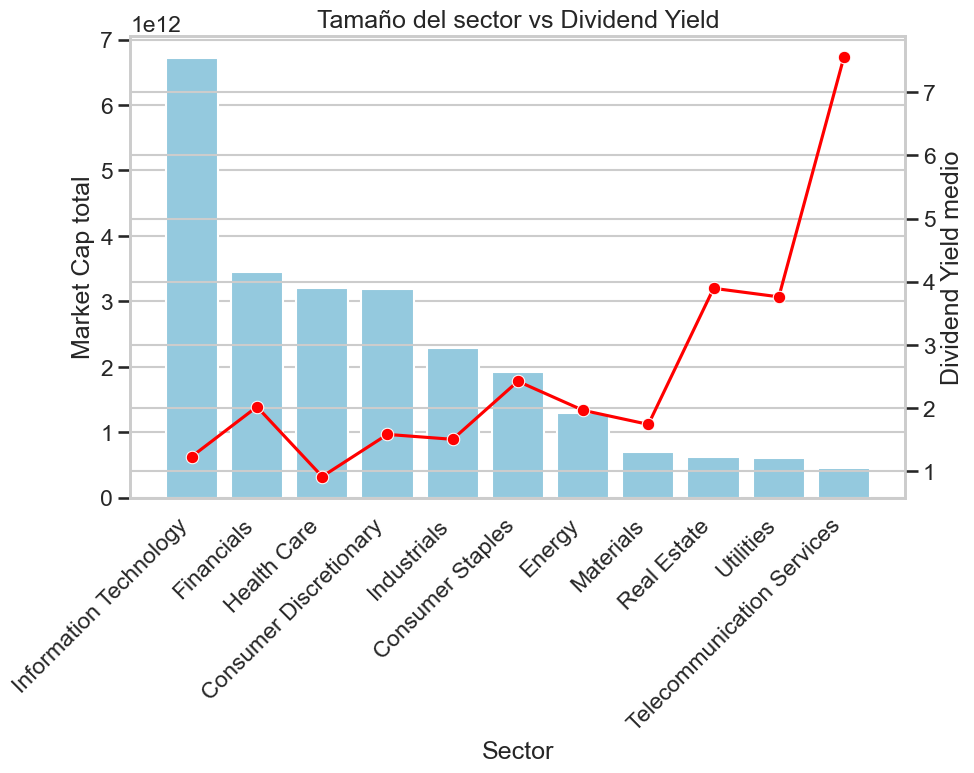

In [59]:
tamano_rendimiento = df.groupby('Sector').agg({
    'Market Cap': 'sum',
    'Dividend Yield': 'mean',
    'Price/Earnings': 'mean'
}).sort_values('Market Cap', ascending=False)

fig, ax1 = plt.subplots(figsize=(10,6))
sns.barplot(x=tamano_rendimiento.index, y=tamano_rendimiento['Market Cap'], ax=ax1, color='skyblue')
ax1.set_ylabel('Market Cap total')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

ax2 = ax1.twinx()
sns.lineplot(x=tamano_rendimiento.index, y=tamano_rendimiento['Dividend Yield'], ax=ax2, color='red', marker='o')
ax2.set_ylabel('Dividend Yield medio')

plt.title('Tamaño del sector vs Dividend Yield')
plt.show()


Como podemos observar, los sectores más grandes referentes a tecnologia o finanzas no son los que presentan un mayor dividendo o mayor rentabilidad por el dividendo en promedio.

# ¿Que relación existe entre nuestras variables?

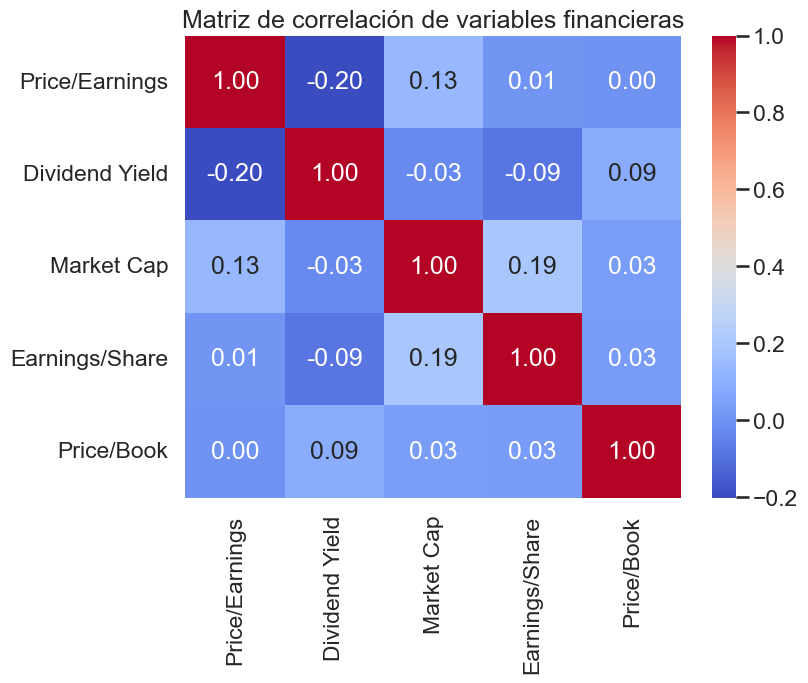

In [60]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Price/Earnings','Dividend Yield','Market Cap','Earnings/Share','Price/Book']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de variables financieras')
plt.show()


# Top 5 empresas con mayor tamaño

In [65]:
top_marketcap = df.sort_values(by='Market Cap', ascending=False).head(10)
print("🏦 Top 5 empresas por tamaño (Market Cap):")
print(top_marketcap)

🏦 Top 5 empresas por tamaño (Market Cap):
                     Name                  Sector    Price  Price/Earnings  \
51             Apple Inc.  Information Technology   155.15           16.86   
27   Alphabet Inc Class A  Information Technology  1007.71           31.48   
28   Alphabet Inc Class C  Information Technology  1001.52           40.29   
311       Microsoft Corp.  Information Technology    85.01           25.76   
30         Amazon.com Inc  Consumer Discretionary  1350.50          296.16   
187        Facebook, Inc.  Information Technology   171.58           27.90   
263  JPMorgan Chase & Co.              Financials   107.88           15.43   
261     Johnson & Johnson             Health Care   126.36           17.31   
185     Exxon Mobil Corp.                  Energy    76.07           21.37   
66   Bank of America Corp              Financials    29.74           16.34   

     Dividend Yield    Market Cap  Earnings/Share  Price/Book  
51         1.579541  8.095080e+11  

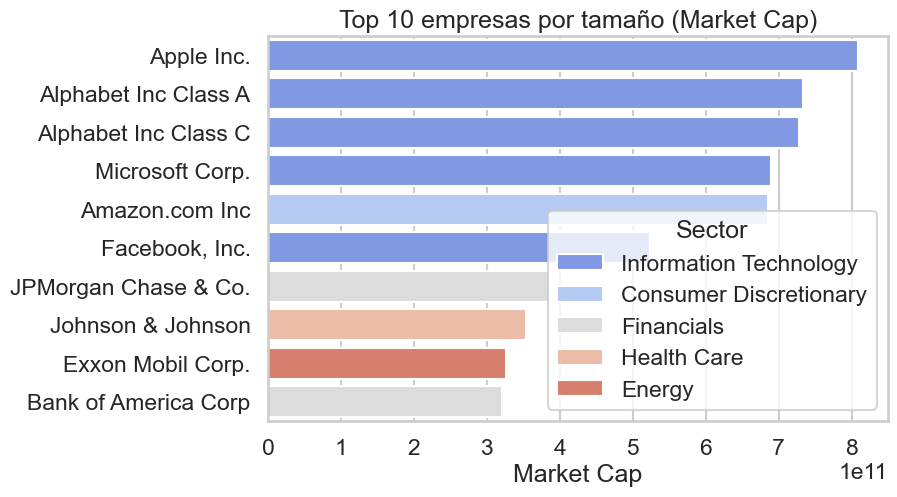

In [67]:
plt.figure(figsize=(8,5))
sns.barplot(data=top_marketcap, x='Market Cap', y='Name', hue='Sector', dodge=False, palette='coolwarm')
plt.title('Top 10 empresas por tamaño (Market Cap)')
plt.xlabel('Market Cap')
plt.ylabel('')
plt.show()

Como es lógico, aquellas empresas como Apple son las que mayor tamaño poseen. Aparecen otras interesante como Bank of America.

# Top 5 empresas con mayor dividendo

In [68]:
top_dividend = df.sort_values(by='Dividend Yield', ascending=False).head(10)
print("\n💰 Top 5 empresas por rentabilidad por dividendo:")
print(top_dividend)


💰 Top 5 empresas por rentabilidad por dividendo:
                           Name                      Sector  Price  \
99              CenturyLink Inc  Telecommunication Services  16.20   
269                Kimco Realty                 Real Estate  14.01   
257  Iron Mountain Incorporated                 Real Estate  32.07   
200                  Ford Motor      Consumer Discretionary  10.43   
405                  SCANA Corp                   Utilities  35.60   
226                    HCP Inc.                 Real Estate  22.64   
486              Welltower Inc.                 Real Estate  54.67   
291                 Macy's Inc.      Consumer Discretionary  24.00   
471                  Ventas Inc                 Real Estate  50.92   
348                       ONEOK                      Energy  54.40   

     Price/Earnings  Dividend Yield    Market Cap  Earnings/Share  Price/Book  
99             8.35       12.661196  1.823720e+10            1.16        1.39  
269            9.28

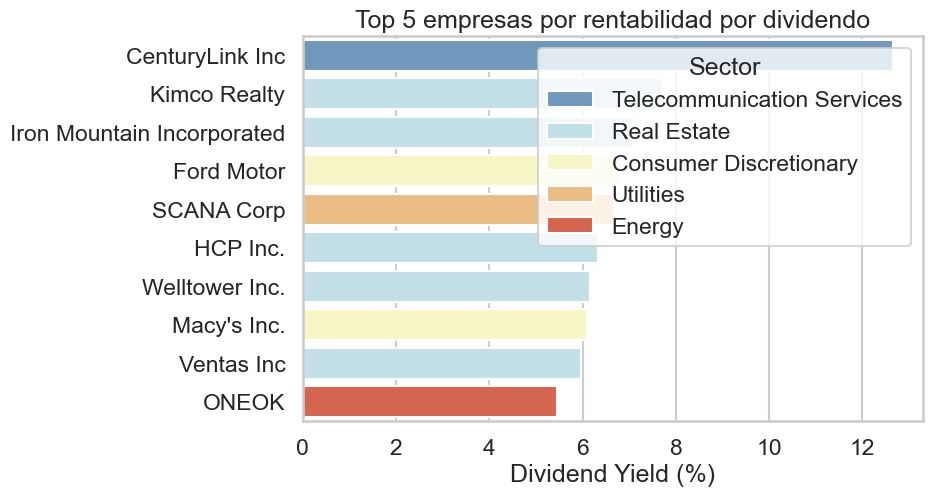

In [71]:
plt.figure(figsize=(8,5))
sns.barplot(data=top_dividend, x='Dividend Yield', y='Name', hue='Sector', dodge=False, palette='RdYlBu_r')
plt.title('Top 5 empresas por rentabilidad por dividendo')
plt.xlabel('Dividend Yield (%)')
plt.ylabel('')
plt.show()

En este caso, al fijarnos en la rentabilidad por dividendo aparecen empresas menos conocidas a priori o que han presentado una mayor rentabilidad. Destacan empresas conocidas como Ford, Scana o Century Link.

In [72]:
df.to_csv("financials_visuals_ready.csv", index=False)

print("✅ Archivo exportado correctamente como 'financials_visuals_ready.csv'")

✅ Archivo exportado correctamente como 'financials_visuals_ready.csv'
